In [1]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np

# Define the path to the processed data
data_path = '../data/processed'

# Check if the processed data folder exists
if not os.path.exists(data_path):
    print("Processed data folder not found. Please run `prepare_data.py` first.")
else:
    print("Processed data folder found. Starting analysis...")
    

Processed data folder found. Starting analysis...


Number of images per class:
              Class  Count
0   100_Dollar_Bill      1
1        100_dollar    618
2    10_Dollar_Bill      1
3         10_dollar    764
4     1_Dollar_Bill      1
5          1_dollar    605
6     2_Dollar_Bill      1
7          2_dollar    617
8    50_Dollar_Bill      1
9         50_dollar    685
10    5_Dollar_Bill      1
11         5_dollar    617


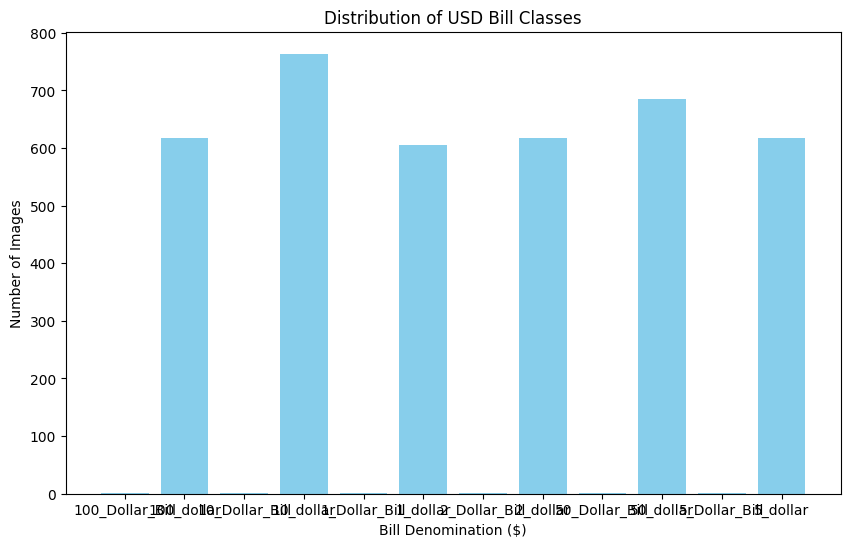

In [2]:

# Get a list of all class folders
class_folders = [os.path.basename(d) for d in glob.glob(os.path.join(data_path, '*')) if os.path.isdir(d)]
class_folders.sort()

# Count images in each folder
class_counts = {}
for class_name in class_folders:
    class_path = os.path.join(data_path, class_name)
    class_counts[class_name] = len(glob.glob(os.path.join(class_path, '*')))

# Create a pandas DataFrame for better visualization
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

print("Number of images per class:")
print(df)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(df['Class'], df['Count'], color='skyblue')
plt.title('Distribution of USD Bill Classes')
plt.xlabel('Bill Denomination ($)')
plt.ylabel('Number of Images')
plt.show()



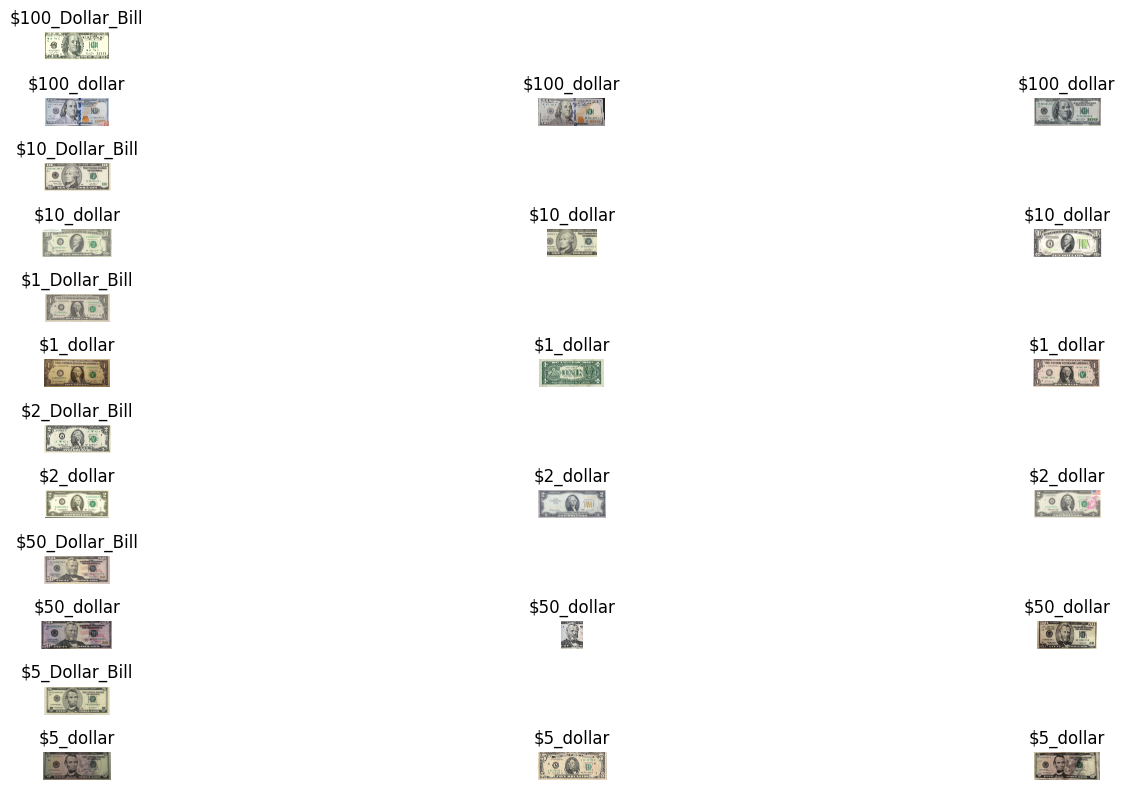

In [3]:

# Function to display random images from each class
def display_sample_images(base_path, class_list, num_samples=3):
    plt.figure(figsize=(15, 8))
    for i, class_name in enumerate(class_list):
        class_path = os.path.join(base_path, class_name)
        image_files = glob.glob(os.path.join(class_path, '*'))
        
        # Select random images
        selected_images = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)
        
        for j, img_path in enumerate(selected_images):
            ax = plt.subplot(len(class_list), num_samples, i * num_samples + j + 1)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f"${class_name}", fontsize=12)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 3 random images for each class
display_sample_images(data_path, class_folders, num_samples=3)

In [8]:

# Get dimensions of all images
image_dimensions = []
for class_name in class_folders:
    class_path = os.path.join(data_path, class_name)
    image_files = glob.glob(os.path.join(class_path, '*'))
    for img_file in image_files:
        try:
            with Image.open(img_file) as img:
                image_dimensions.append(img.size)
        except Exception as e:
            print(f"Skipping corrupt or unreadable file: {img_file}")

# Convert to a DataFrame and find unique dimensions
dims_df = pd.DataFrame(image_dimensions, columns=['width', 'height'])
unique_dims = dims_df.value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

print("Most common image dimensions and their counts:")
print(unique_dims)



Most common image dimensions and their counts:
      width  height  count
0      1400     600     18
1       852     480     15
2       540     360     11
3       626     417      9
4       612     408      8
...     ...     ...    ...
3605    237      97      1
3606    237      98      1
3607    237     102      1
3608    237     105      1
3609    225      98      1

[3610 rows x 3 columns]
